# Stochastic Shortest Path Problems - Static

The most classical deterministic problem illustrated in graph, wehere we have to find the best path from node $1$ to node $11$, where cost of travesring each arc is known in advance.

+ $N$ = The set of all nodes in the network (here, this is the nodes 1,2..,11)
+ $N^{+}_i$ = The set of all nodes that can be reached directly from node $i$.
+ $N_j^{-}$ = The set of all nodes that are connected to node $J$
+ $\zeta$ = Set of all links $(i,j)$ in thr network,
+ $c_{ij}$ = The cost of traversing link $(i,j)$ , where $j$ is assumed to be in the set $N_i^{+}$

Now let $v_i$ be the minimum cost to get from node $i$ to the destination node 11 . The values $v_i$ fo all nodes $i \in N$ should satisfy:

$$
v_i = min \ (c_{ij} + v_j) \\
j \in N_i^{+}
$$

<img src="pics/network_determ_path.png" width=800 height=600 />

**Another way to view our network**

$$
V_t(s) = min \ (C(s,x) + V_{t+1}(S_{t+1})) \\
x \in \chi_s
$$

Where $S_{t+1} = S^M(s,x)$.

The equation above is deterministic version of what is known as Bellman's equation.

## Narrative:

We assume that our system has access to both historical and real-time link costs, from which we can create estimates of the mean and variance of the cost traversing a link. We can think of this as a shortest path problem where we see distributions rather than actual costs, as depicted in below figure. After we traverse a link from $i$ to $j$, we then experience sample realization from the distribution. We want to choose a path that minimizes the expected cost.

## Basic Model

## Stochastic Shortest Path- Adaptive

In this type of problem, we will lose our ability to find optimal policies using Bellman's equation.  

+ In our first stochastic shortest path, we assumed that we had to choose the next link to traverse **before** we see the actual travel cost over link
+ Now assume that we get to see the travel cost **before** we make decsion.

If we pretend for the moment that someone can give us the values $v_j$ which is the minimum travel cost from node $j$ to our destination node, $r$ an optimal policy for choosing the next downstream node would be written:

$$
X^{\pi}(i) = arg \ min(\hat{c}_{ij} + v_j) \\
j \in N_i^{+}
$$

The problem here is that we can not compute $v_j$ as we did before using Bellman's equation.

In our network problem, our physical state would be the node where we are located, while the "other information" variable $I_t$ would capture the costs on links our of the node we are located. 

$$
S_t = (R_t, I_t) \\
\ \  = (i, (\hat{c}_{tij})) \\ j \in N_i^{+} 
$$

To see what this does to our previous way of solving our shortest path problem, take a fresh look at Bellman's equation as we first introduced : 

$$
V_t(S_t) = min \ (C(S_t,x) + V_{t+1}(S_{t+1})) \\
x \in \chi_s
$$

Where $S_{t+1}$ would be given by:

+ $S_{t+1} = (R_{t+1}, I_{t+1})$ , where
+ $R_{t+1}$ = The node produced by our decision $x$. So if $x_{ij}=1$, then $R_{t+1} =j$
+ $I_{t+1}$ = The costs that are observed our of node $R_{t+1}$, which depends on the decision $x$. If $x$ sends us to node $j$ so that $R_{t+1} = j$, then $I_{t+1} = (\hat{c}_{t+1,jk_1},\hat{c}_{t+1,jk_2}, \hat{c}_{t+1,jk_3})$

As we can see, even if we assume that the costs $\hat{c}_{t+1,j}$ are discrete, the state space just grew exponentially. Imagine that we have discretized costs into buckets 20 values. If tehre are three links our of every node, our state spaces has grown fromthe number of nodes, to $20\times20\times20 = 8,000$ times larger.

At time $t$ (which is when we are computing $V_t(S_t)$ in above equation, the link costs $I_{t+1}$ out of downstream $R_{t+1}$ (which is detremined by the decsion $x$) are not known.We fix this by taking the expectation, which we write as:

$$
V_t(S_t) = min \ \ (C(S_t,x)) + \mathbb{E}\{V_{t+1}(S_{t+1}) | S_t, x\}) \\
x \in \chi_s
$$

The expectation operator $E$ should be viewed as taking an average over the possible path costs that a traveler might encounter once they arrive at node $R_{t+1}$ when making decision $x$ (which determines $R_{t+1}$) 

This is our first peak at what happens when a state varibale becomes a vector. The number of possible values of the the state variable grows exponetially, a process known widely as the *curse of dimentionality*.

The main challenge with the equation below is:

$$
V_t(S_t) = min \ \ (C(S_t,x)) + \mathbb{E}\{V_{t+1}(S_{t+1}) | S_t, x\}) \\
x \in \chi_s
$$

is the *expectation operator*, which is easily the most dangerous piece of notation solving sequential decision problem 

**First Strategies**

First, we introduce the idea of the *post decision*state which we designate $S_t^x$. The post-decision state is the state of the system after we make a decision.

<img src="pics/the_state.png" width=800 height=600 />

**State**:

$$
S_t = (6, (12.7, 8.9, 13.5))
$$

**Post-decision, after decsion "going to node 9"**  

$$
S_t^x = (9)
$$ 

First going to first step from the pre-decsion satte $S_t$ to post-decsion state $S_t^x$ which we do by rewriting equation 13:

$$
V_t(S_t) = min \ (C(S_t, x) + V_t^x(S_t^x)) \\
x \in \chi_s
$$

We still have to compute $V_t^x(S_t^x)$ which is done using,

$$
V_t^x(S_t^x) = \mathbb{E}\{V_{t+1}(S_{t+1})| S_t,x)
$$

We are going to construct approximation $\overline{V}_t^{x}(j)$ of the value of being at node $j$, where:

$$
\overline{V}_t^{x,n}(j) \sim \mathbb{E}\{V_{t+1}(S_{t+1})| S_t\}
$$

We are then going to update our estimate of the value of being at node $i$ using:

$$
\overline{V}_{t}^{x,n}(i) = (1- \alpha_n)\overline{V}_t^{x, n-1}(i) + \alpha_n v_t^{n}(i)
$$

## Coding Part

In [19]:
import numpy as np
import pandas as pd
from copy import copy
from collections import (namedtuple, defaultdict)
import matplotlib.pyplot as plt
import os as os

In [20]:
os.chdir("/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap5_Sto_Short_Path_Static/function")

In [21]:
from StaticModelAdaptive import StaticModel
from PolicyAdaptive import Policy

In [22]:
seed = 89720123
#reading parameter file and initializing variables
file = '/home/peyman/Documents/PhD_UiS/seqdec_powell_repo/Chap5_Sto_Short_Path_Static/function/Parameters.xlsx'
parDf = pd.read_excel(file, sheet_name = 'parameters')
parDict=parDf.set_index('Index').T.to_dict('list')
print("Starting adaptive stochastic shortest path with parameters")
params = {key:v for key, value in parDict.items() for v in value}
params

Starting adaptive stochastic shortest path with parameters


{'nNodes': 150,
 'probEdge': 2,
 'LO_UPPER_BOUND': 10,
 'HI_UPPER_BOUND': 20,
 'nIterations': 5,
 'stepsize_rule': 'Constant',
 'theta_set': '1 .5 .2 .1'}

In [23]:
params.update({'seed':seed})
print(params)

{'nNodes': 150, 'probEdge': 2, 'LO_UPPER_BOUND': 10, 'HI_UPPER_BOUND': 20, 'nIterations': 5, 'stepsize_rule': 'Constant', 'theta_set': '1 .5 .2 .1', 'seed': 89720123}


In [24]:
state_names = ['CurrentNode', 'CurrentNodeLinksCost']
decision_names = ['NextNode']

In [25]:
# create the model, given the above policy
M = StaticModel(state_names, decision_names,  params)
policy_names = ['PureExploitation']
P = Policy(M, policy_names)
    
theta_list = M.init_args['theta_set'].split()
obj_along_iterations = {theta:[] for theta in theta_list}
vbar_along_iterations = {theta:[] for theta in theta_list}

Created the graph
max_origin_node: 1 -  max_target_node: 109  - distance: 10
Computed V_0
		key_0 = 44.03
		key_1 = 47.33
		key_2 = 54.90
		key_3 = 46.35
		key_4 = 38.92
		key_5 = 40.27
		key_6 = 33.54
		key_7 = 45.82
		key_8 = 49.18
		key_9 = 46.90
		key_10 = 47.37
		key_11 = 40.19
		key_12 = 30.16
		key_13 = 52.82
		key_14 = 48.15
		key_15 = 45.75
		key_16 = 40.77
		key_17 = 37.48
		key_18 = 60.67
		key_19 = 59.97
		key_20 = 56.98
		key_21 = 51.84
		key_22 = 40.74
		key_23 = 48.17
		key_24 = 43.72
		key_25 = 34.85
		key_26 = 27.55
		key_27 = 24.02
		key_28 = 20.91
		key_29 = 54.97
		key_30 = 51.99
		key_31 = 51.98
		key_32 = 44.67
		key_33 = 55.60
		key_34 = 67.72
		key_35 = 58.33
		key_36 = 53.58
		key_37 = 52.39
		key_38 = 42.00
		key_39 = 45.48
		key_40 = 46.76
		key_41 = 48.24
		key_42 = 50.41
		key_43 = 57.31
		key_44 = 46.97
		key_45 = 42.24
		key_46 = 51.85
		key_47 = 39.25
		key_48 = 46.67
		key_49 = 51.57
		key_50 = 48.85
		key_51 = 43.64
		key_52 = 34.02
		key_53 = 32.54
		

In [26]:
for theta in theta_list:
    model = copy(M)
    model.theta_step = float(theta)
    model.prng = np.random.RandomState(model.init_args['seed'])
    
    print("************Starting iterations for theta {}".format(model.theta_step))

    for ite in list(range(model.init_args['nIterations'])):
        
        model.obj = 0 
        model.state = model.build_state(model.init_state)
        
        print("\tTheta {}  - Iteration {} - Stepsize {:.2f} - InitState {} - Vbar {:.2f}".format(model.theta_step,model.n,model.alpha(),model.state.CurrentNode,model.V_t[model.state.CurrentNode]))
        
        step = 1
        while model.state.CurrentNode != model.init_args['target_node']:
                # calling policy and choosing a decision
                decision,vhat = P.make_decision(model)
                x = model.build_decision({'NextNode': decision})
                
                print("\t\t Theta {}  - Iteration {} - Step {} - Current State {} - vbar = {:.2f}".format(model.theta_step,model.n,step, model.state.CurrentNode,model.V_t[model.state.CurrentNode]))
                

                # update vfa
                vbar = model.update_VFA(vhat)
                
                # print current state, decision , vhat and new vbar
                #model.print_State()
                print("\t\tDecision={}, vhat {:.2f} and new vbar for current state {:.2f}".format(x[0],vhat,model.V_t[model.state.CurrentNode]))

                # transition to the next state w/ the given decision
                model.transition_fn(x)
                step += 1

        print("Finishing Theta {} and Iteration {} with {} steps. Total cost: {} \n".format(model.theta_step,model.n,step-1,model.obj))
        model.n+=1
        obj_along_iterations[theta].append(model.obj)
        vbar_along_iterations[theta].append(model.V_t[model.origin_node])

************Starting iterations for theta 1.0
	Theta 1.0  - Iteration 1 - Stepsize 1.00 - InitState 1 - Vbar 47.33
		 Theta 1.0  - Iteration 1 - Step 1 - Current State 1 - vbar = 47.33
		Decision=51, vhat 48.22 and new vbar for current state 48.22
		 Theta 1.0  - Iteration 1 - Step 2 - Current State 51 - vbar = 43.64
		Decision=52, vhat 45.11 and new vbar for current state 45.11
		 Theta 1.0  - Iteration 1 - Step 3 - Current State 52 - vbar = 34.02
		Decision=53, vhat 34.19 and new vbar for current state 34.19
		 Theta 1.0  - Iteration 1 - Step 4 - Current State 53 - vbar = 32.54
		Decision=120, vhat 33.61 and new vbar for current state 33.61
		 Theta 1.0  - Iteration 1 - Step 5 - Current State 120 - vbar = 23.44
		Decision=28, vhat 22.83 and new vbar for current state 22.83
		 Theta 1.0  - Iteration 1 - Step 6 - Current State 28 - vbar = 20.91
		Decision=91, vhat 21.19 and new vbar for current state 21.19
		 Theta 1.0  - Iteration 1 - Step 7 - Current State 91 - vbar = 15.66
		Decisio

Totals  [240.71348135540603, 240.71348135540603, 240.71348135540603, 240.71348135540603]


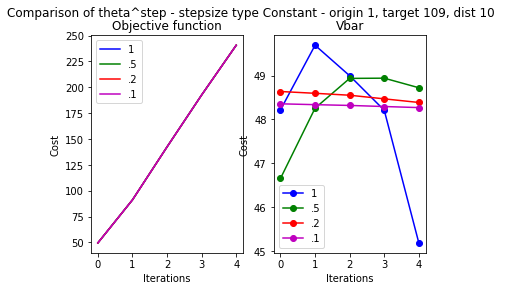

In [27]:
#Ploting the results
fig1, axsubs = plt.subplots(1,2)
fig1.suptitle('Comparison of theta^step - stepsize type {} - origin {}, target {}, dist {} '.format(M.init_args['stepsize_rule'],M.origin_node,M.target_node,M.dist) )
  
color_list = ['b','g','r','m','c']
nThetas = list(range(len(theta_list)))
Iterations = list(range(model.init_args['nIterations']))

    
totals = [np.array(obj_along_iterations[theta]).sum() for theta in theta_list]
print("Totals ",totals)


for theta,t in zip(theta_list,nThetas):
        
        axsubs[0].plot(Iterations, np.array(obj_along_iterations[theta]).cumsum(), "{}-".format(color_list[t]),label = "{}".format(theta))
        #axsubs[0].plot(Iterations, obj_along_iterations[theta], "{}-".format(color_list[t]),label = "{}".format(theta))

        axsubs[0].set_title('Objective function')
        axsubs[0].legend()
        axsubs[0].set_xlabel('Iterations')
        axsubs[0].set_ylabel('Cost')

        axsubs[1].plot(Iterations, vbar_along_iterations[theta], "{}o-".format(color_list[t]),label = "{}".format(theta))
        axsubs[1].set_title('Vbar')
        axsubs[1].legend()
        axsubs[1].set_xlabel('Iterations')
        axsubs[1].set_ylabel('Cost')


        #axsubs.plot(Iterations, obj_along_iterations[theta], "{}o-".format(color_list[t]),label = "{}".format(theta))
        #axsubs[0].set_title('Cost')
        #axsubs.legend()
        #axsubs.set_xlabel('Iterations')
        #axsubs.set_ylabel('Cost')

plt.show()